# Implementação de Agentes usando Gymnasium

# Importações

In [ ]:
#!pip install swig                                                              # instala pacotes necessários para o uso do Gym
#!pip install gymnasium[box2d]                                                  # instala pacotes necessários para o uso do Gym
import gymnasium as gym                                                         # Importa a biblioteca do Gym para criação dos ambientes
import numpy as np                                                              # Importa a biblioteca NumPy para operações matemáticas
import matplotlib.pyplot as plt                                                 # Importa a biblioteca Matplotlib para visualização de dados
import imageio                                                                  # Importa a biblioteca imageio para ler arquivos de imagem
from IPython.display import display, Image                                      # importa as funções display para exibir objetos no colab e Image para carregar imagens de arquivos
from gym.envs.toy_text.frozen_lake import generate_random_map                   # Importa a função generate_random_map para gerar lagos aleatórios

# Configurações iniciais

## Configurações do ambiente e da execução

In [ ]:
env = gym.make('FrozenLake-v1', desc=generate_random_map(size=4), is_slippery=False, render_mode="rgb_array")   # Escolha do ambiente, no caso, o lago congelado
total_steps = 1000                                                                                              # Total de tentativas de atravessar o lago
remainer_steps = total_steps                                                                                    # Quantidade restante de tentativas de atravessar o lago
reward = 0                                                                                                      # recompensa inicial
total_Frames = []                                                                                               # lista de frames de todas as tentativas

## Função do agente

In [ ]:
def Agent_Logic(observation):
  # observações: variam de 0 a 15, referentes as posições do personagem no lago
  # ações possíveis: 0 a 3, referentes aos movimentos de esquerda, baixo, direita e cima, respectivamente
  act = env.action_space.sample()   # aqui vai a lógica do seu agente, ele tem que ler a observação e baseado nela, gerar a ação
  return act                        # retorna a ação escolhida

# Código Principal

In [ ]:
while reward == 0 and remainer_steps > 0:                                       # Enquanto não chegar ao destino e ainda tiver tentativas de atravessar, executa o programa
  observation, info = env.reset()                                               # captura a primeira observação do ambiente
  episode_over = False                                                          # flag que indica se o episódio terminou
  frames = []                                                                   # lista dos frames da tentativa atual
  while not episode_over:                                                       # Se o episódio ainda não terminou, continua executando
    action = Agent_Logic(observation)                                           # Escolha da ação baseado na observação e na lógica criada
    observation, reward, terminated, truncated, info = env.step(action)         # Efetiva a ação no ambiente
    frames.append(env.render())                                                 # Captura o frame atual e adiciona na lista
    episode_over = terminated or truncated                                      # Se o episodio terminou (caiu no lago ou chegou ao final) ou andou demais, termina o episodio
  remainer_steps = remainer_steps - 1                                           # Reduz uma tentativa
  total_Frames.extend(frames)                                                   # Adiciona os frames da tentativa atual na lista de todas as tentativas
print("Quantidade de tentativas: " + str(total_steps-remainer_steps))           # Quando finaliza, exibe a quantidade de tentativas usadas (para chegar ao destino ou não)
env.close()                                                                     # Fecha o ambiente

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Quantidade de tentativas: 54


# Código de exibição

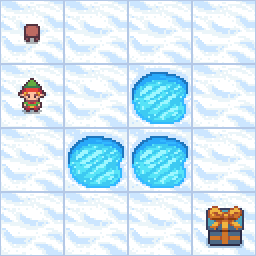

In [ ]:
# Criar e exibir GIF de tentativa que deu certo
imageio.mimsave("Best_Walk.gif", frames, duration=0.5)                          # Gera um gif a partir das imagens geradas na última tentativa
display(Image(filename="Best_Walk.gif"))                                        # Exibe o gif gerado

# Código de exibição de todas as tentativas

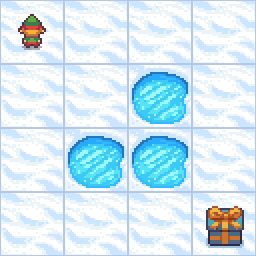

In [ ]:
# Criar e exibir GIF de tentativa que deu certo
imageio.mimsave("All_Walk.gif", total_Frames, duration=0.5)                     # Gera um gif a partir das imagens geradas de todas as tentativas
display(Image(filename="All_Walk.gif"))                                         # Exibe o gif gerado

## ATIVIDADE PRÁTICA 1


Para alguns cenários que serão elencados a seguir, sem realizar uma implementação. Se concentre no design da tarefa e responda.

1. Descreva a natureza do ambiente de tarefa
  - Tipo de agente
  - PEAS: Performace, Ambiente, Atuadores e Sensores
  - Propriedades

2. Defina a estrutura de um agente racional
  - Arquitetura
  - Programa


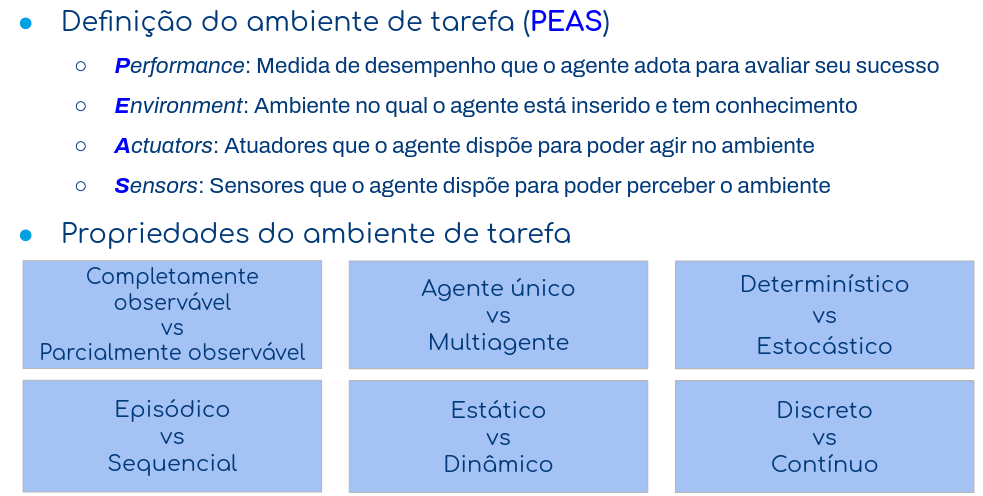

## Cenário 1 - Lago congelado

Objetivo do agente
- Sair da posição A e chegar na posição B
Restrições
- Não cair nos buracos do gelo







**Especifique:**

**Tipo de agente:** **Agente reativo simples**

**PEAS:**

| Categoria       | Descrição                                                                 |
|-----------------|---------------------------------------------------------------------------|
| **Performance** |   Encontrar o caminho para o destino final, testando aleatoriamente |
| **Ambiente**    | Matrix 4x4, contém obstáculos(lago de gelo) e um objetivo final  |
| **Atuadores**   | Movimento para cima e para baixo e para os lados|
| **Sensores**    | Envio de mensagem: chegou no objetivo, caiu no buraco, não caiu nem chegou no objetivo |

**Propriedades:**
Parcialmente observável, Agente único, Deterministico, Episódico, Estático, Discreto.

**Arquitetura:**
Identifica se está em uma célula da matrix que contém um buraco no gelo, se continua andando ou se chegou o objetivo final. Não é salvo a "experiencia" do agente, tendo seus movimentos baseados em regras preestabelecidas.  
**Programa:**
Condicionais: se a célula seguinte for um buraco, reinicie o trajeto e conte como uma tentativa. Caso a próxima célula não seja um buraco no gelo e não for o objetivo continue andando, caso seja o objetivo finalize o jogo e conte como melhor tentativa.

## Cenário 2 - Controle de semáforo

Objetivo do agente
- Controlar o fluxo de uma avenida através do seu semáforo
Restrições
- Observar tanto os pedestres quanto os veículos (quantidade)




**Especifique:**

**Tipo de agente:** **Agente que aprende**

**PEAS:**

| Categoria       | Descrição                                                                 |
|-----------------|---------------------------------------------------------------------------|
| **Performance** | Realizar a melhor operação para controlar o fluxo de uma avenida através do controle dos semáforos   |
| **Ambiente**    | Uma avenida que tem passagem de veiculos e pedestres, região movimentada e com grande fluxo de pessoas  |
| **Atuadores**   | Semáforo de transito e de pedestres (mudando as cores verde, amarelo, vermelho) baseado na condição do fluxo  |
| **Sensores**    | Câmeras para observar os pedestres e os veículos  |

**Propriedades:**
Completamente observável, Multiagente, Estocástico, Sequencial, Dinâmico, Contínuo.

**Arquitetura:**
O agente através dos sensores detectam quantidade de veículos e presença de pedestres, através de câmeras para identificar o fluxo de tráfego. O tempo do semáforo e controlado através do processamento do agente. Descobre a melhor ação baseado na condição observada, no caso, o fluxo to tráfego.

**Programa:**
o agente observa a quantidade de pessoas e automóveis, verificando o estado atual do fluxo. Após essa analise, deve ser escolhido uma ação da cor que será mostrada no semáforo. O semáforo muda a cor mostrada tanto para os pedestres quanto para os condutores. O agente analisa como foi o resultado de suas ações e aprende para melhorias futuras, caso tenha sido positiva, continua aplicando, caos seja negativa aprende novamente. Desta forma, temos esse fluxo: Observa, escolhe uma ação, aplica a ação, mede o impacto da ação, aprende com base nesses dados, repete o processo.

## Cenário 3 - Controle de iluminação residencial

Objetivo do agente
- Acender ou apagar as luzes dos cômodos

Restrições
- Controlar a intensidade e acender apenas sob presença



**Especifique:**

**Tipo de agente:** **Agente que aprende**

**PEAS:**

| Categoria       | Descrição                                                                 |
|-----------------|---------------------------------------------------------------------------|
| **Performance** | As luzes de um comôdo devem ser acessas quando necessário  |
| **Ambiente**    | O agente vai observar a presença de pessoas que entram e saem de uma sala  |
| **Atuadores**   | Controlar a intensidade da luz no ambiente, aumentando a itensidade baseado na presença de individuos  |
| **Sensores**    | Interruptor, sensor de luminosidade  |

**Propriedades:**
Completamente observável, agente único, determinístico, sequencial, dinâmico, contínuo.


**Arquitetura:**
Os sensores que o agente tem acesso é para detectar quando um usuário sai ou entra do comôdo e detectar a luminosidade do comôdo. Decide se faz a ação de acender as luzes baseado na condicional de presença ou não de pessoas. Os atuadores vão ligar e desligar as luzes, depedendo da luminosidade do ambiente.

**Programa:**
A condicional de presença ou não de usuários, tem que existir um loop de decisão que executa os sensores de presença e luminosidade. O agente escolhe uma ação baseado no que analisou do ambiente, se existe presença de usuários deve acender as luzes, baseado na luminosidade do ambiente, caso não tenha deve apagar as luzes. O agente executa aa ação depois de analisar os dados. Por fim, repete o processo.
Um exemmplo que podemmos ter de função seria:
caso o sensor de presença entenda que tem pessoas na sala, e a luminosidade do ambiente é baixa, deve acender as luzes. Caso contrário apagar as luzes.

##  Extra: Otimização com Aprendizado por reforço


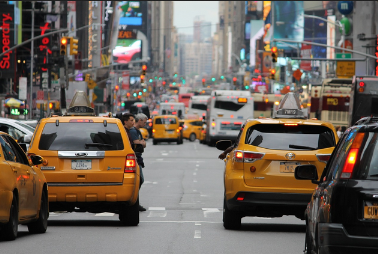

Na busca por eficiência e eficácia no transporte urbano, encontrar as rotas ideais para levar os passageiros de seus pontos de partida até os destinos desejados é fundamental. Esse desafio não se resume apenas a reduzir o tempo de viagem; trata-se de melhorar a experiência geral tanto para motoristas quanto para passageiros, garantindo segurança e minimizando o impacto ambiental.

Você foi encarregado de revolucionar a maneira como os táxis navegam pelo ambiente urbano, assegurando que os passageiros cheguem aos seus destinos de forma rápida, segura e satisfatória. Como um primeiro passo, seu objetivo é construir um agente de aprendizado por reforço que resolva esse problema dentro de um ambiente simulado.

## O ambiente Taxi-v3
O ambiente Taxi-v3 é uma simulação estratégica, oferecendo uma arena baseada em grade onde um táxi navega para enfrentar desafios diários semelhantes aos enfrentados por motoristas de táxi. Esse ambiente é definido por uma grade 5x5, onde a missão do táxi envolve pegar um passageiro em um dos quatro locais específicos (marcados como Vermelho, Verde, Amarelo e Azul) e deixá-lo em outro ponto designado. O objetivo é cumprir essa tarefa com o menor tempo possível na estrada para maximizar as recompensas, enfatizando a necessidade de otimização de rotas e tomada de decisões eficientes para o embarque e desembarque de passageiros.

### Componentes Principais:
- **Espaço de Ações:** Compreende seis ações, onde 0 move o táxi para o sul, 1 para o norte, 2 para o leste, 3 para o oeste, 4 realiza o embarque de um passageiro, e 5 realiza o desembarque de um passageiro.
- **Espaço de Observação:** Compreende 500 estados discretos, levando em conta 25 posições possíveis do táxi, 5 localizações possíveis para o passageiro e 4 destinos.
- **Sistema de Recompensas:** Inclui uma penalidade de -1 para cada passo dado sem outra recompensa, +20 para a entrega bem-sucedida de um passageiro, e -10 para ações ilegais de embarque ou desembarque. Ações que não resultam em operação, como bater em uma parede, também acarretam uma penalidade de tempo.




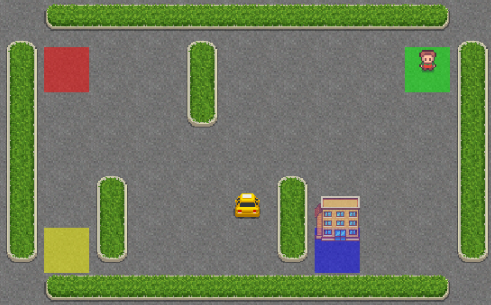

In [ ]:
# Re-run this cell to install and import the necessary libraries and load the required variables
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100

In [ ]:
# Start coding here
# Feel free to add as many cells as you want
# Parameters for training
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001
alpha = 0.1  # Learning rate
gamma = 1 # Discount factor


Treine um agente por 2.000 episódios, permitindo um máximo de 100 ações por episódio (`max_actions`), utilizando Q-learning. Registre as recompensas totais obtidas em cada episódio e salve-as em uma lista chamada `episode_returns`.

Quais são os valores de Q aprendidos? Salve-os em um array do NumPy chamado `q_table`.

Qual é a política aprendida? Salve-a em um dicionário chamado `policy`.

Teste a política aprendida pelo agente em um episódio, iniciando com uma semente (`seed`) de valor 42. Salve os estados encontrados a partir de `env.render()` como quadros em uma lista chamada `frames`, e a soma das recompensas coletadas em uma variável chamada `episode_total_reward`. Certifique-se de que seu agente não execute mais do que 16 ações para resolver o episódio. Se o processo de aprendizado for eficiente, o valor de `episode_total_reward` deverá ser pelo menos 4.

Execute a última célula fornecida para visualizar o desempenho do seu agente ao navegar eficientemente pelo ambiente. Observe que a renderização pode levar até um minuto.


## Como abordar o projeto

1. Treinando o agente com Q-learning

2. Analisando os valores de Q e a política aprendidos

3. Testando a política aprendida

## 1. Treinando o agente com Q-learning

Treine o agente por 2.000 episódios utilizando Q-learning, limitando a 100 ações por episódio e registrando as recompensas por episódio na lista `episode_returns`.

### Inicialização da Q-table

- A `q_table` é inicializada com zeros, com o número de linhas igual ao número de estados no ambiente e o número de colunas igual ao número de ações possíveis.
- `env.observation_space.n` retorna o número de estados no ambiente.
- `env.action_space.n` retorna o número de ações possíveis.

### Laço de episódios

- Construa um laço para iterar por 2.000 episódios. Dentro desse laço, gerencie as ações de cada episódio com outro laço que roda até que 100 ações sejam executadas ou o episódio termine.
- Para inicializar o ambiente, você pode usar `env.reset()`, que retorna um estado inicial junto com algumas informações auxiliares.
- O método `env.action_space.sample()` ajuda a selecionar uma ação aleatória do espaço de ações.
- Para executar uma ação específica, utilize `env.step(action)`.


In [ ]:
# Determine the environment's number of states and actions
_ = env.observation_space.n # PREENCHER
_ = env.action_space.n  # PREENCHER

# Initialize the Q-table with zeros
q_table = np.zeros((_, _)) # PREENCHER

### Estratégias de seleção de ações

- Ao selecionar ações durante o treinamento, considere estratégias que equilibrem exploração e explotação/aproveitamento (como epsilon-greedy ou epsilon-greedy com decaimento) para um processo de aprendizado eficaz.
- Para determinar o equilíbrio entre exploração e aproveitamento, defina uma probabilidade de exploração `epsilon` e gere um número aleatório; se esse número for menor que `epsilon`, o agente explora; caso contrário, ele aproveita o conhecimento atual.
- Para gerar um número aleatório entre 0 e 1, você pode usar `np.random.rand()`.

In [ ]:
# Epsilon-greedy strategy function
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax( _ )  # Exploit # PREENCHER


### Regra de atualização do Q-learning

A regra de atualização do Q-learning é representada pela equação abaixo.

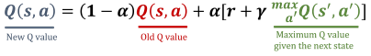

- Você pode acessar o valor Q de um estado `s` e ação `a` utilizando `q_table[s, a]`.


In [ ]:
# Atualização da função do Q-learning
def q_learning_update(state, action, reward, next_state):
    old_value = q_table[state, action]
    next_max = max(q_table[next_state])
    q_table[state, action] = _ # PREENCHER


### Laço de episódios

- Construa um laço para iterar por 2.000 episódios. Dentro desse laço, gerencie as ações de cada episódio com outro laço que roda até que 100 ações sejam executadas ou o episódio termine.
- Para inicializar o ambiente, você pode usar `env.reset()`, que retorna um estado inicial junto com algumas informações auxiliares.
- O método `env.action_space.sample()` ajuda a selecionar uma ação aleatória do espaço de ações.
- Para executar uma ação específica, utilize `env.step(action)`.


In [ ]:
# List to store the total reward per episode
episode_returns = []

# Training loop
for episode in range(2000):
    state, info = env.reset()
    terminated = False
    total_reward = 0

    for i in range(max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        q_learning_update(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if terminated:
          break

    episode_returns.append(total_reward)
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon*epsilon_decay)

## 2. Analisando os valores de Q e a política aprendidos

Após o treinamento, inspecione a `q_table` para verificar os valores de Q aprendidos. Derive e salve a ação ótima para cada estado na variável `policy`.

### Definindo a política

- Uma política é um dicionário que mapeia cada estado do ambiente para a ação que apresenta o maior valor de Q.


In [ ]:
# Deriving the policy
policy = {state: np.argmax( _ [state]) for state in range( _ )}  # PREENCHER

## 3. Testando a política aprendida

Avalie o agente testando-o em um ambiente com semente igual a 42, restringindo o número de ações a 16. Armazene a sequência de estados em `frames` e a soma das recompensas em `episode_total_reward`, que deve ser pelo menos 4.

### Especificando a semente

- Para reiniciar o ambiente com uma semente específica `s`, utilize `env.reset(seed=s)`.


In [ ]:
## Testing the agent's behavior

# List to store frames
frames = []
state, info = env.reset(seed=42)
frames.append(env.render())
episode_total_reward = 0
for i in range(16): # Execute maximum 16 moves
    action = policy[state]
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    if terminated:
      break

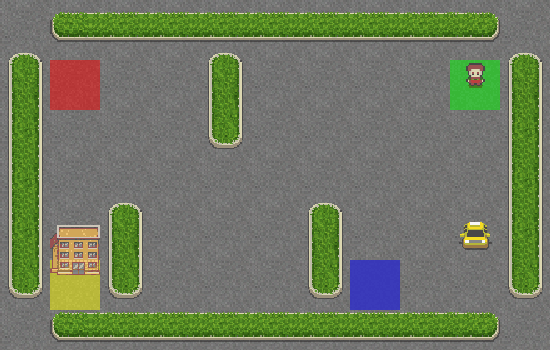

In [ ]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5, loop=0)

# Display GIF
gif_path = "taxi_agent_behavior.gif"
Image(gif_path)